In [12]:
##### General ToDo list:

# For select_data() function, add "STAGE/ROUTE" selection
#     As a default, pick 'Urgent SUPECTED CANCER' instead of NAtional screening
#     Add an ooption to view screening 'STAGE/ROUTE' only as well

#//ToDo: write a function to fliter out only singificant breaches/ significant number of cases pe trust etc

# Create some plotting/analysis functions for Screening programme specifically?

# Create a script, where a figure is plotted using the trust name from the link file using the org code

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [2]:
from data_wrangling import get_national
from cancer_plotting import plot_stacked

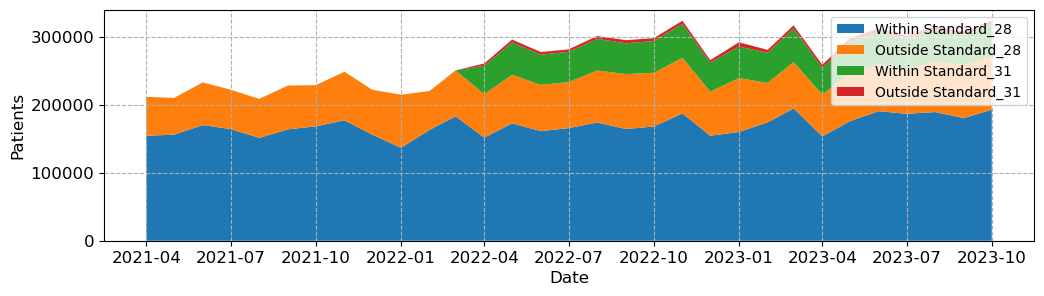

In [3]:
# code example being used - note will need to run the national_data code first 
national_data_link = r'https://www.england.nhs.uk/statistics/wp-content/' \
    + 'uploads/sites/2/2023/12/' \
    + 'CWT-CRS-National-Time-Series-Oct-2009-Oct-2023-with-Revisions.xlsx'

national_data = get_national(national_data_link)
labels = ['Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31'] 
data_to_plot=['Month','Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31']
fig, ax = plot_stacked(national_data[data_to_plot],labels,"Patients")

In [7]:
from data_wrangling import read_cancer_data, nhs_code_link, help_with, read_icb_sicb_coding
from data_wrangling import select_month, select_org, select_cancer, select_standard
from data_wrangling import select_data
from data_wrangling import proportion_breaches, rename_and_replace

from cancer_plotting import breaches_animated_plot


In [5]:
data = read_cancer_data()

In [6]:
data = proportion_breaches(rename_and_replace(data))

In [ ]:
link_data = nhs_code_link()
# overlap = list(set(data['ORG CODE']) & set(link_data['ORG CODE']))
# unmatched = data[~data['ORG CODE'].astype(str).isin(link_data['ORG CODE'].astype(str))]

In [ ]:
#plt.figure(figsize=[10,10])
sns.stripplot(x='PERIOD', y = 'BREACHES', data=select_org(df=data,org_str='R1K'), hue = 'CANCER TYPE', legend=False)

In [ ]:
sns.lineplot(x='PERIOD', y='BREACHES', data=select_org(data,'R0A').groupby(by='PERIOD').sum())

Selected suspected_breast_ca


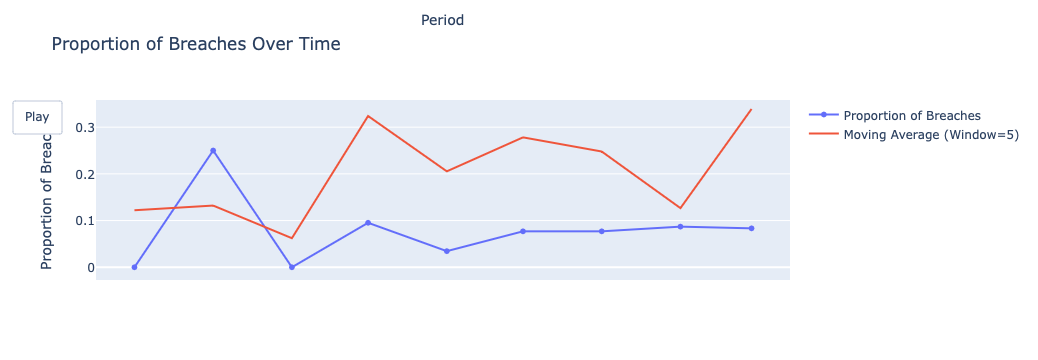

In [20]:
# Need to add informative title displaying type of cancer and full name of organisation + national standard on the plot
# Need to handle if some orgs do not have certain cancers/standards
trial = select_data(data,[('cancer',3), ('org', 'r0a'), ('standard', 'FDS')])
trial = trial.loc[trial['STAGE/ROUTE'] =='NATIONAL SCREENING PROGRAMME']
breaches_animated_plot(trial,[])


In [60]:
######## Below is work in progress on creating a map with statistics

In [65]:
icb_codes = read_icb_sicb_coding()
nhs_link = nhs_code_link()

icb_code_to_names = dict(zip(icb_codes['ICB22CDH'], icb_codes['ICB22NM']))
org_to_icb = dict(zip(nhs_link['ORG_CODE'], nhs_link['Higher Level Health Geography']))

data['hhlg'] = data['ORG_CODE'].map(org_to_icb)
data['icb'] = data['hhlg'].map(icb_code_to_names)

In [36]:
import geopandas as gpd
path_to_shapefile = 'data/ons_shapefile/Integrated_Care_Boards_April_2023_EN_BFC_1659257819249669363/'

In [37]:
gdf = gpd.read_file(path_to_shapefile)

In [41]:
len(gdf

42